<a href="https://colab.research.google.com/github/iambrookedrake/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Brooke_Drake_DSPT6_U1S3M4_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df_NoNaN = df.drop('Unnamed: 32', axis=1)#All NaNs
df_NoLabels = df_NoNaN.drop('diagnosis', axis=1)#Drops Labels
df_NoLabels.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
cat_cols = df.columns[df.dtypes=='object']
num_cols = df.columns[df.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

1 categorical columns
32 numerical columns


In [0]:
#change dtype to category
df[cat_cols] = df[cat_cols].astype('category')
#df.dtypes

In [0]:
#Change B/M 'diagnosis' to category codes 0/1:
for col in cat_cols:
  df[col] = df[col].cat.codes

print(df.shape)
#df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
#Excludes ID & Diagnosis Column, and breaks up into managable size for Seaborn plotting
dfONE=df[df.columns[2:12]] #ALL _means
diag = df['diagnosis']
dfONE['diagnosis'] = diag 
#sns.pairplot(dfONE, hue='diagnosis')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#Excludes ID & Diagnosis Column, and breaks up into managable size for Seaborn plotting
dfTWO=df[df.columns[12:22]]#All _se
dfTWO['diagnosis'] = diag 
#sns.pairplot(dfTWO, hue='diagnosis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


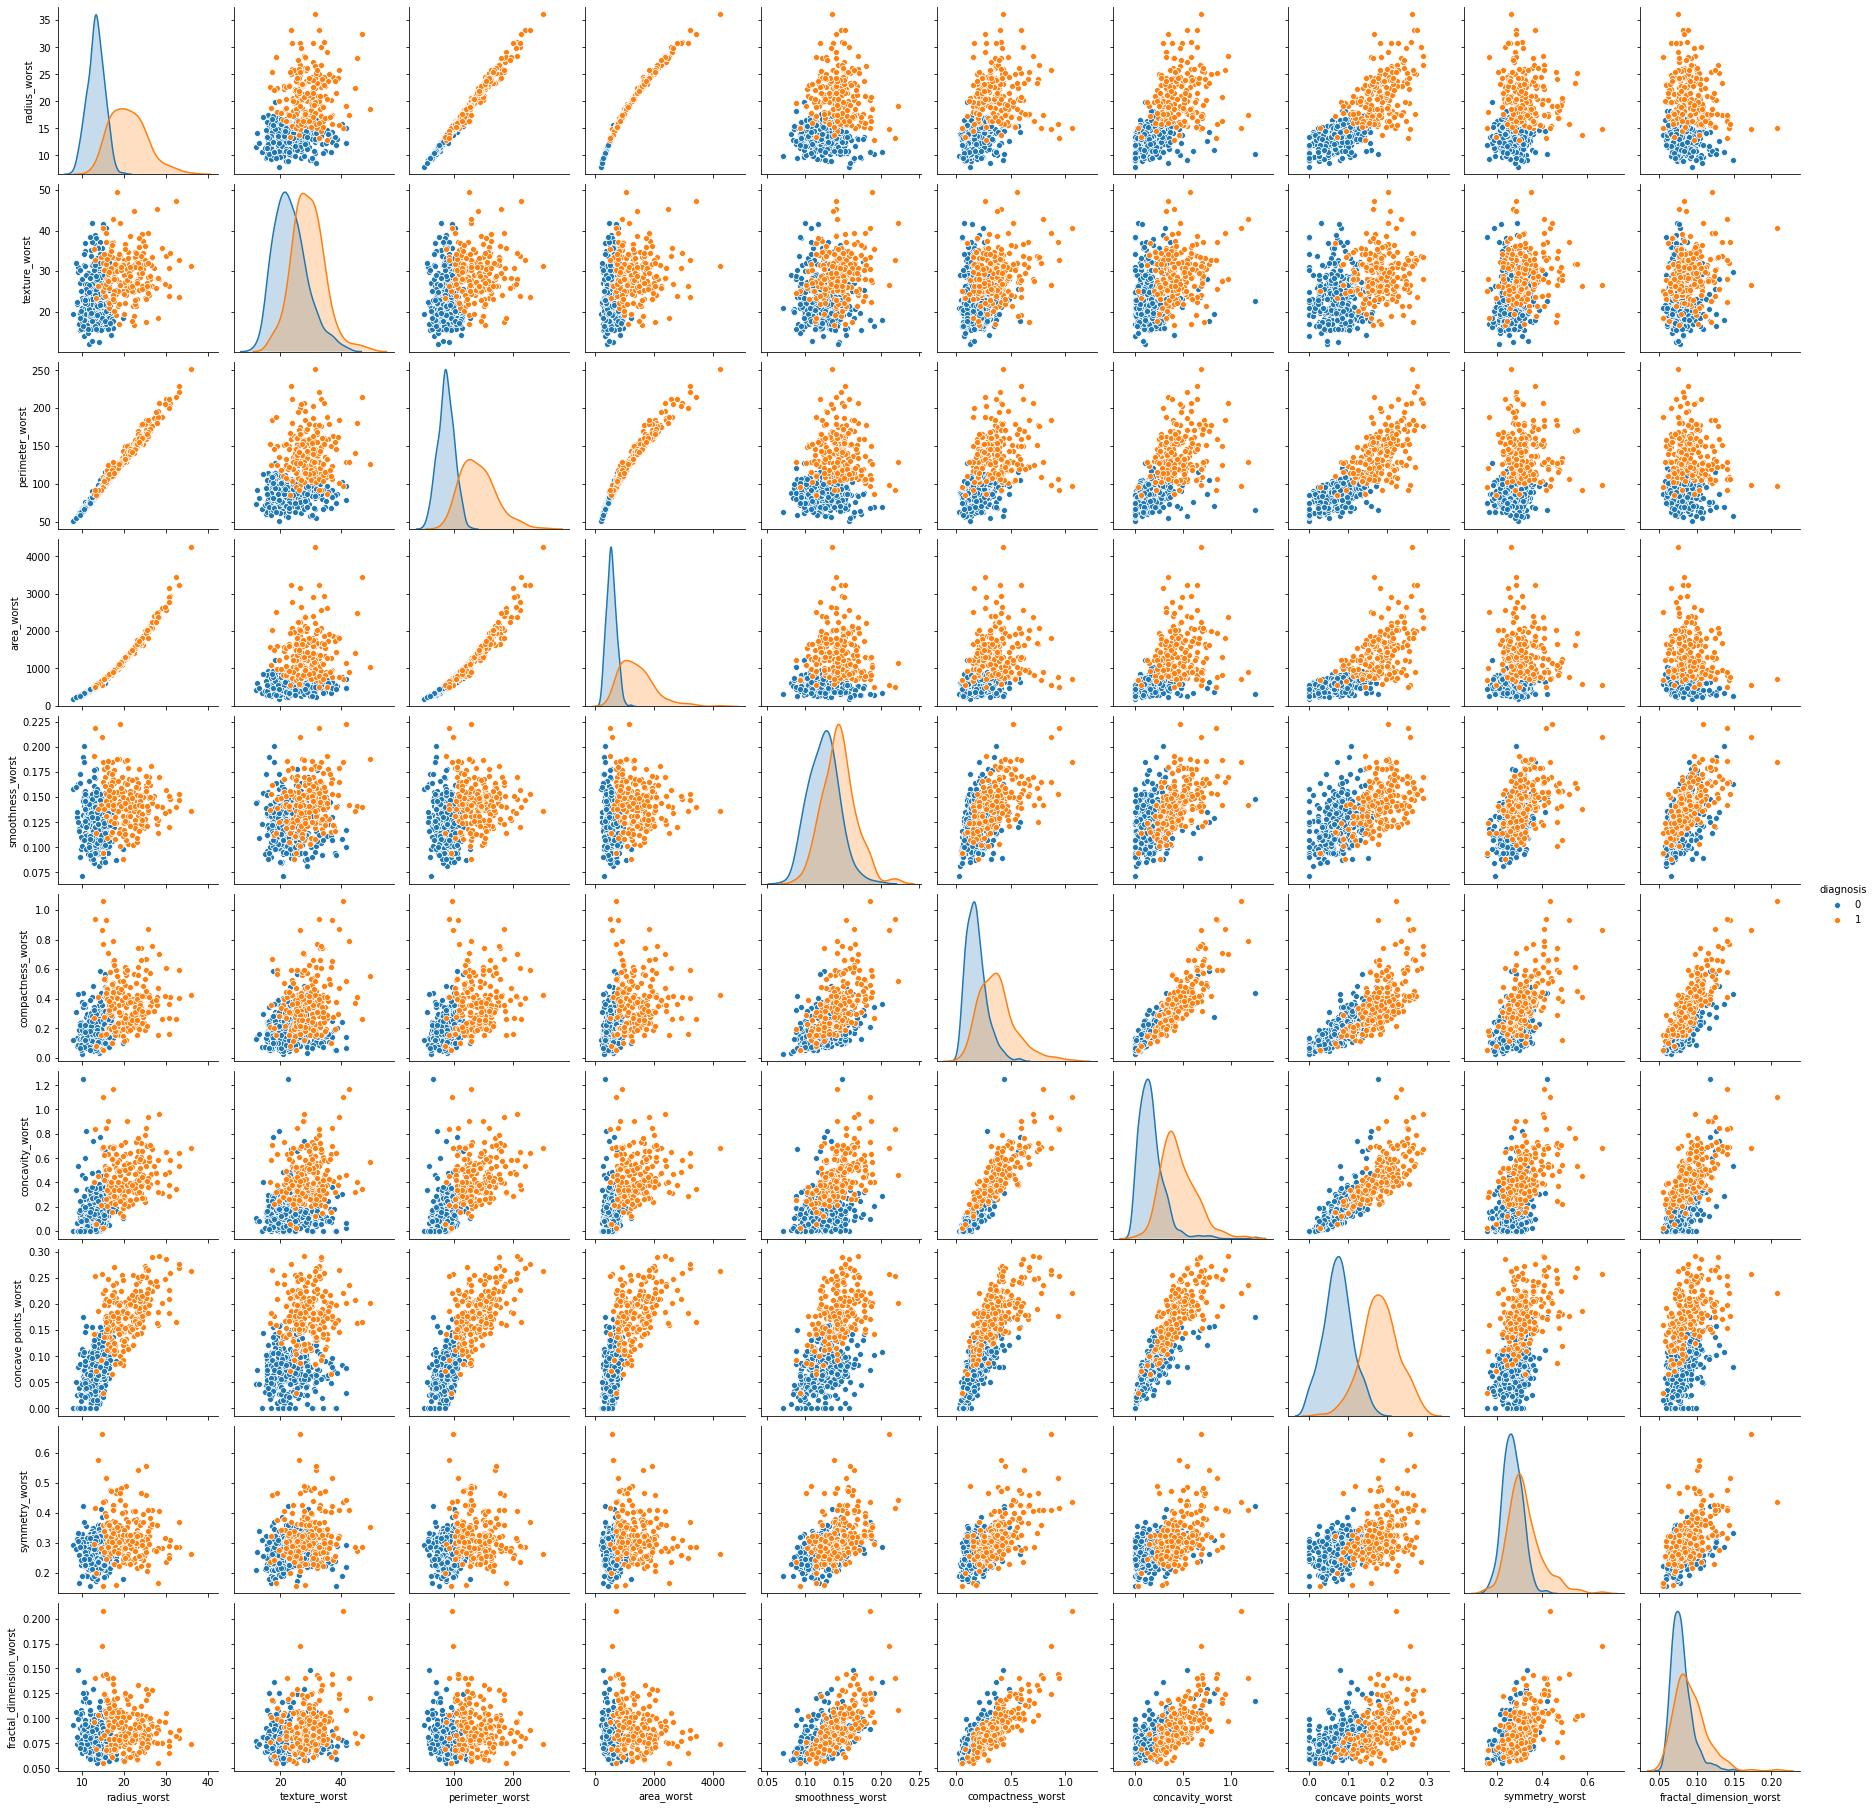

In [0]:
#Excludes ID & Diagnosis Column, and breaks up into managable size for Seaborn plotting
dfTHR=df[df.columns[22:32]] #All_worst
dfTHR['diagnosis'] = diag 
sns.pairplot(dfTHR, hue='diagnosis')#This one has most distinct seperation

In [0]:
df_worst= dfTHR.drop('compactness_worst', axis=1)
df_worst= df_worst.drop('symmetry_worst', axis=1)
df_worst= df_worst.drop('fractal_dimension_worst', axis=1)
print(df_worst.shape)
df_worst.head()

(569, 8)


,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,diagnosis
0,25.38,17.33,184.60,2019.0,0.1622,0.7119,0.2654,1
1,24.99,23.41,158.80,1956.0,0.1238,0.2416,0.1860,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4504,0.2430,1
3,14.91,26.50,98.87,567.7,0.2098,0.6869,0.2575,1
4,22.54,16.67,152.20,1575.0,0.1374,0.4000,0.1625,1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


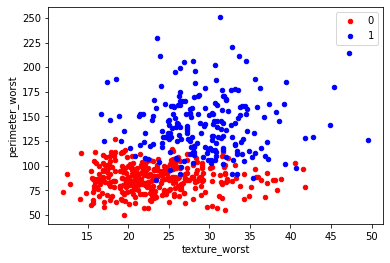

In [0]:
dfA=df_worst[df_worst.columns[1:3]]
dfB=df_worst[df_worst.columns[1:3]]
dfB['diagnosis'] = diag
# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dfB.groupby('diagnosis')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='texture_worst', y='perimeter_worst', label=key, color=colors[key])
plt.show()    

In [0]:
dataset_centroid_x = dfA.texture_worst.mean()
dataset_centroid_y = dfA.perimeter_worst.mean()

print(dataset_centroid_x, dataset_centroid_y)

25.677223198594014 107.2612126537786


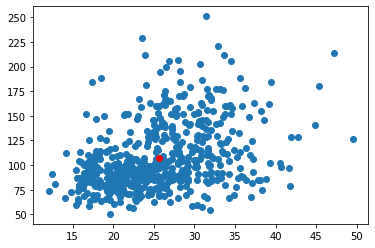

In [0]:
#centroid of entire dataset
ax.plot(dfA.texture_worst, dfA.perimeter_worst)
ax = plt.subplot(1,1,1)
ax.scatter(dfA.texture_worst, dfA.perimeter_worst)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

In [0]:
#Initialize the algorithm by choosing random points to serve as the initial fake "centroids"
centroids = dfA.sample(2)
centroids.head()

,texture_worst,perimeter_worst
48,20.70,89.88
414,36.91,110.10


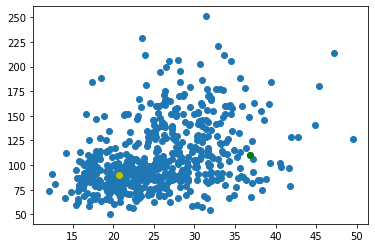

In [0]:
#Use that sample as first iteration
ax = plt.subplot(1,1,1)
ax.scatter(dfA.texture_worst, dfA.perimeter_worst)
ax.plot(centroids.iloc[0].texture_worst, centroids.iloc[0].perimeter_worst, "oy")
ax.plot(centroids.iloc[1].texture_worst, centroids.iloc[1].perimeter_worst, "og")
#ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [0]:
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [0]:
first_pass = find_nearest_centroid(dfA.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,texture_worst,perimeter_worst,cluster_1
0,17.33,184.60,1
1,23.41,158.80,1
2,25.53,152.50,1
3,26.50,98.87,0
4,16.67,152.20,1


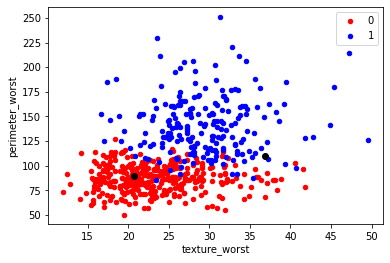

In [0]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'blue'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].texture_worst, centroids.iloc[0].perimeter_worst, "ok")
  ax.plot(centroids.iloc[1].texture_worst, centroids.iloc[1].perimeter_worst, "ok")

  grouped = dfB.groupby('diagnosis')
  for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='texture_worst', y='perimeter_worst', label=key, color=colors[key])
  plt.show()  
 
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

           texture_worst  perimeter_worst
cluster_1                                
0              23.436790        84.376481
1              28.640082       137.525102


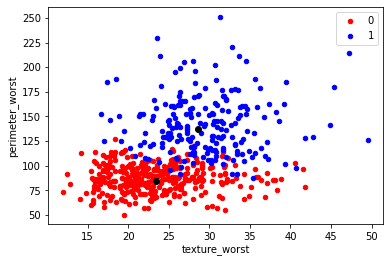

In [0]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
print(centroids)
plot_clusters(second_pass, 'cluster_2', centroids)

In [0]:
convergence = np.array_equal(first_pass['cluster_1'], second_pass['cluster_2'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_2                                
0              24.114663        87.053450
1              28.605051       145.125253


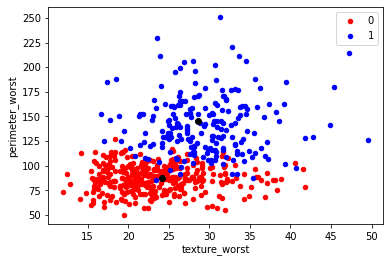

In [0]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
print(centroids)
plot_clusters(third_pass, 'cluster_3', centroids)

In [0]:
convergence = np.array_equal(second_pass['cluster_2'], third_pass['cluster_3'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_3                                
0              24.248291        88.840276
1              29.003041       150.135673


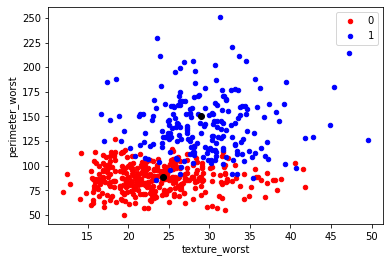

In [0]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
print(centroids)
plot_clusters(fourth_pass, 'cluster_4', centroids)

In [0]:
convergence = np.array_equal(third_pass['cluster_3'], fourth_pass['cluster_4'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_4                                
0              24.371663        89.614743
1              29.014563       152.370000


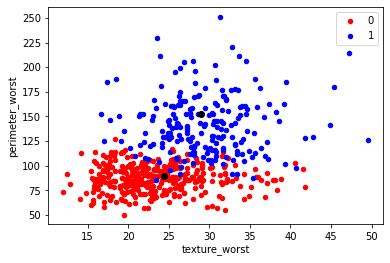

In [0]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
print(centroids)
plot_clusters(fifth_pass, 'cluster_5', centroids)

In [0]:
convergence = np.array_equal(fourth_pass['cluster_4'], fifth_pass['cluster_5'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_5                                
0              24.394504        89.908789
1              29.073141       153.200641


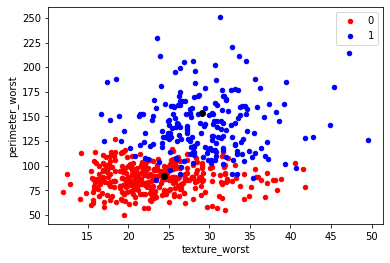

In [0]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
print(centroids)
plot_clusters(sixth_pass, 'cluster_6', centroids)

In [0]:
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_6                                
0              24.387343        89.984855
1              29.122452       153.405806


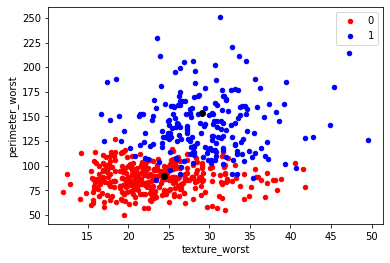

In [0]:
# Calculate New Centroids
centroids = get_centroids(sixth_pass, 'cluster_6')

# Get Clusters for New Centroids
seventh_pass = find_nearest_centroid(sixth_pass.select_dtypes(exclude='int64'), centroids, '7')

# Plot New Cluster
print(centroids)
plot_clusters(seventh_pass, 'cluster_7', centroids)

In [0]:
convergence = np.array_equal(sixth_pass['cluster_6'], seventh_pass['cluster_7'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_7                                
0              24.408627        90.060072
1              29.095844       153.614935


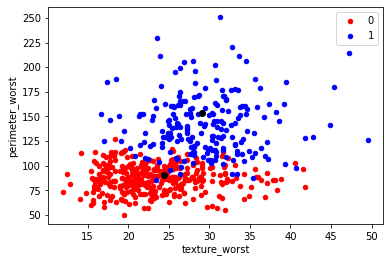

In [0]:
# Calculate New Centroids
centroids = get_centroids(seventh_pass, 'cluster_7')

# Get Clusters for New Centroids
eighth_pass = find_nearest_centroid(seventh_pass.select_dtypes(exclude='int64'), centroids, '8')

# Plot New Cluster
print(centroids)
plot_clusters(eighth_pass, 'cluster_8', centroids)

In [0]:
convergence = np.array_equal(seventh_pass['cluster_7'], eighth_pass['cluster_8'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


           texture_worst  perimeter_worst
cluster_8                                
0              24.405361        90.137091
1              29.135359       153.820915


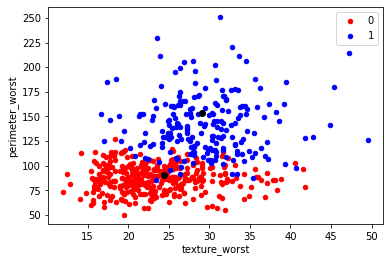

In [0]:
# Calculate New Centroids
centroids = get_centroids(eighth_pass, 'cluster_8')

# Get Clusters for New Centroids
ninth_pass = find_nearest_centroid(eighth_pass.select_dtypes(exclude='int64'), centroids, '9')

# Plot New Cluster
print(centroids)
plot_clusters(ninth_pass, 'cluster_9', centroids)

In [0]:
convergence = np.array_equal(eighth_pass['cluster_8'], ninth_pass['cluster_9'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  True


In [0]:
#scaler = StandardScaler()
#cancer = scaler.fit_transform(cancer)
#cancer

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here
# Initialize an instance of the KMeans class from sklearn.
k = 2
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
# Fit the instantiated model to our sliced dataframe
model.fit(df_worst.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df_worst.head()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,concavity_worst,concave points_worst,diagnosis
0,25.38,17.33,184.60,2019.0,0.1622,0.7119,0.2654,1
1,24.99,23.41,158.80,1956.0,0.1238,0.2416,0.1860,1
2,23.57,25.53,152.50,1709.0,0.1444,0.4504,0.2430,1
3,14.91,26.50,98.87,567.7,0.2098,0.6869,0.2575,1
4,22.54,16.67,152.20,1575.0,0.1374,0.4000,0.1625,1


In [0]:
df_worst['cluster'] = model.labels_

In [0]:
centroids    =  model.cluster_centers_
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1,2,3,4,5,6,7
0,14.056535,24.709954,92.032187,620.944875,0.130051,0.219859,0.091701,0.189066
1,23.741154,28.943615,158.688462,1757.361538,0.140195,0.448902,0.191955,0.992308


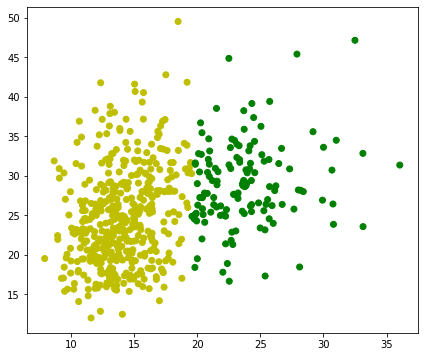

In [0]:
base_colors  =  ['y', 'g']
colors       =  [base_colors[centroid] for centroid in model.labels_]
fig, ax      =  plt.subplots(figsize=(7,6))
ax.scatter(df_worst['radius_worst'], df_worst['texture_worst'], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
# what's our silhouette score?
# the metrics module will be your best friend
from sklearn import metrics
metrics.silhouette_score(df_final, model.labels_, metric='euclidean')

0.4663700488652955

In [0]:
acc_score=pd.DataFrame(model.labels_, columns=['pred'])
acc_score['dx']=df['diagnosis']
compare = np.where(acc_score["pred"] == acc_score["dx"])
acc_score['equal'] = (acc_score["pred"] == acc_score["dx"])

correct = sum(acc_score['equal'])
total = df.shape[0]

accurate = correct/total
print("Raw Un-Standardized Clustering Accuracy is ",accurate)

Raw Un-Standardized Clustering Accuracy is  0.8541300527240774


# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
# Make a copy of our dataframe, we will standarize the copy so as to not
# overwrite our original data

cancer = df_NoLabels.copy()
#cancer = cancer.drop('Unnamed: 32', axis=1)
print(cancer.shape)
cancer.head(2)

(569, 31)


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [0]:
cancer.isnull().sum().any()

False

In [0]:
from sklearn.preprocessing import StandardScaler
feature_cols=cancer.columns[1:]
feature_cols[:5]

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean'],
      dtype='object')

In [0]:
# normalizing the features
x = cancer.loc[:, feature_cols].values
x = StandardScaler().fit_transform(x)

# Let's check whether the normalized data has a mean of zero and a standard deviation of one.
print('{:.2f}'.format(np.mean(x)))
print(np.std(x))

0.00
1.0


In [0]:
# convert the normalized features into a dataframe
norm_cancer = pd.DataFrame(x,columns=feature_cols)
#norm_cancer.head(2)

In [0]:
# pass the desired number of components 
pca_cancer = PCA(n_components=2)

# call fit_transform on the aggregate data
pca_cancer_data = pca_cancer.fit_transform(x)

# create a DataFrame that will have 
# the principal component values for all 569 samples
df_final = pd.DataFrame(data = pca_cancer_data, columns = ['comp_1', 'comp_2'])
#df_final.head(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


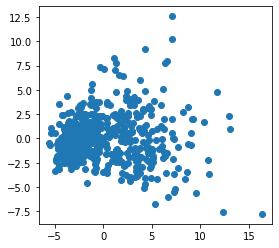

In [0]:
axes = plt.gca()
plt.axes().set_aspect('equal')
plt.scatter(df_final['comp_1'], df_final['comp_2'])

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

In [0]:
#scree_plot(pca_cancer)

In [0]:
# pass the desired number of components 
pca_cancer10 = PCA(n_components=10)

# call fit_transform on the aggregate data
pca_cancer_data10 = pca_cancer10.fit_transform(x)

# create a DataFrame that will have 
# the principal component values for all 569 samples
df_final10 = pd.DataFrame(data = pca_cancer_data10, columns = ['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7', 'comp_8', 'comp_9', 'comp_10'])
#df_final10.head(2)

In [0]:
#scree_plot(pca_cancer10)

In [0]:
# instantiate the sklearn class
# pass the desired number of components 
pca_cancer7 = PCA(n_components=7)

# call fit_transform on the aggregate data
pca_cancer_data7 = pca_cancer7.fit_transform(x)

# create a DataFrame that will have 
# the principal component values for all 569 samples
df_final7 = pd.DataFrame(data = pca_cancer_data7, columns = ['comp_1', 'comp_2', 'comp_3', 'comp_4', 'comp_5', 'comp_6', 'comp_7'])
#df_final7.head(2)

In [0]:
#scree_plot(pca_cancer7)

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

In [0]:
#  how much variation did each principal component explain?
print("Component Variation explained: ",pca_cancer.explained_variance_ratio_)
# How much total variance did we explain?
print("Total Variation explained: ",sum(pca_cancer7.explained_variance_ratio_))
# How much information did we lose?
print("Information Lost: ",1-sum(pca_cancer7.explained_variance_ratio_))


print("Thi method provides higher accuracy with less time investment")

Component Variation explained:  [0.44272026 0.18971182]
Total Variation explained:  0.9100953006870512
Information Lost:  0.08990469931294875


# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project